In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img1 = cv2.imread('suduku.png')
img = cv2.GaussianBlur(img1,(5,5),0)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
mask = np.zeros((gray.shape),np.uint8)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))

close = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel1)
div = np.float32(gray)/(close)
res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))
res2 = cv2.cvtColor(res,cv2.COLOR_GRAY2BGR)

In [2]:
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

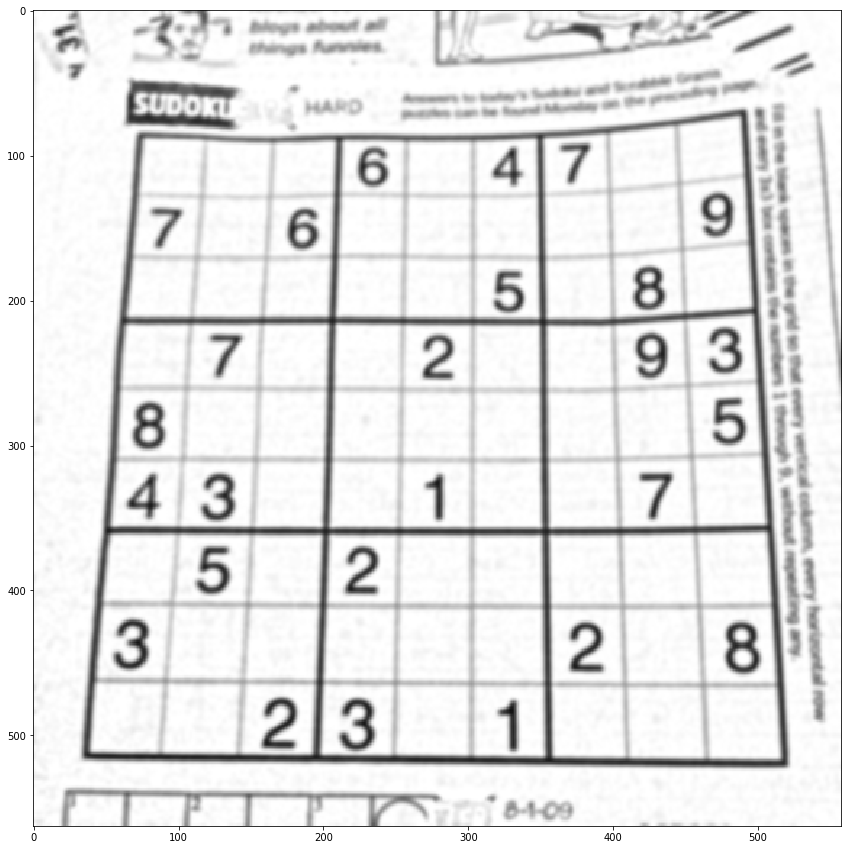

In [3]:
show_pic(img)


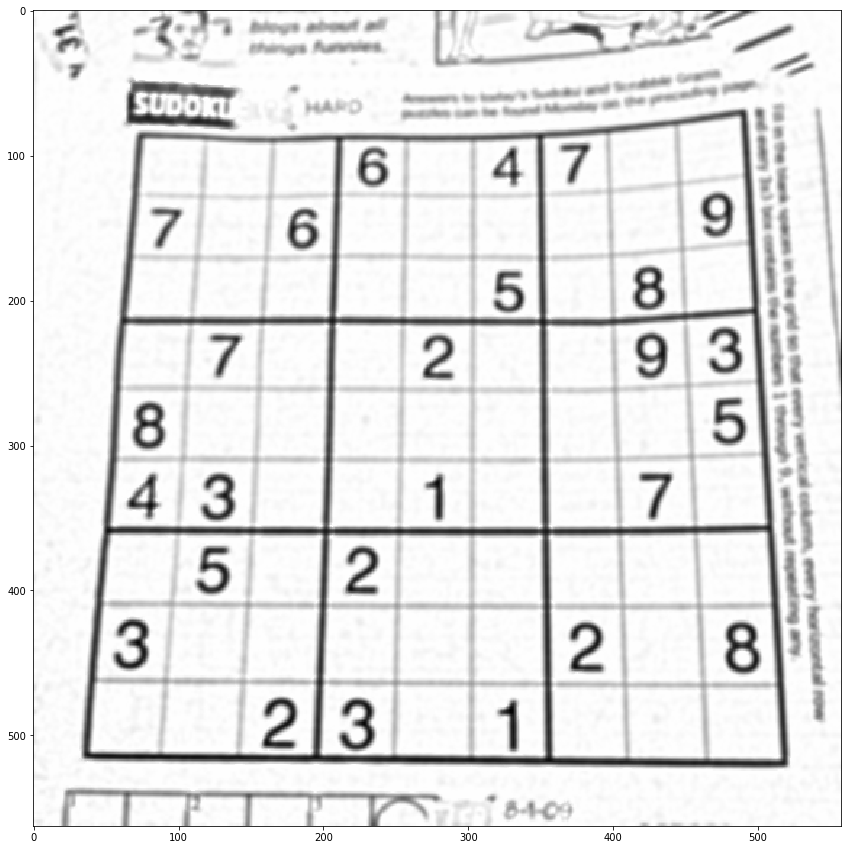

In [4]:
show_pic(res2)

array([[[246, 246, 246],
        [246, 246, 246],
        [248, 248, 248],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[248, 248, 248],
        [248, 248, 248],
        [249, 249, 249],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[249, 249, 249],
        [249, 249, 249],
        [250, 250, 250],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[242, 242, 242],
        [240, 240, 240],
        [235, 235, 235],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[248, 248, 248],
        [246, 246, 246],
        [240, 240, 240],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       [[250, 250, 250],
        [248, 248, 248],
        [242, 242, 242],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]]

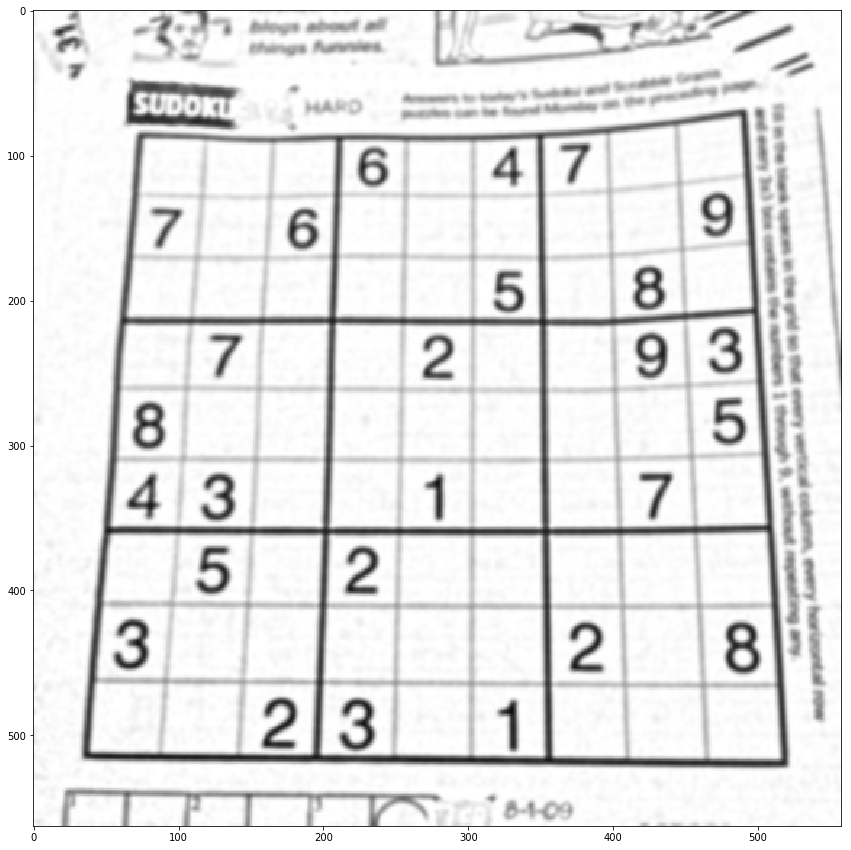

In [5]:
res2 = cv2.addWeighted(src1=img,alpha=0.7,src2=res2,beta=0.3,gamma=0)
show_pic(res2)
gamma = 0.9
invGamma = 1/gamma
table = np.array([((i / 255.0) ** invGamma) * 255
                  for i in np.arange(0, 256)]).astype("uint8")
cv2.LUT(res2, table, res2)

In [6]:
thresh = cv2.adaptiveThreshold(res,255,0,1,19,2)
contour,hier = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
best_cnt = None
for cnt in contour:
    area = cv2.contourArea(cnt)
    if area > 1000:
        if area > max_area:
            max_area = area
            best_cnt = cnt

cv2.drawContours(mask,[best_cnt],0,255,-1)
cv2.drawContours(mask,[best_cnt],0,0,2)

res = cv2.bitwise_and(res,mask)

In [7]:
gamma = 0.9
invGamma = 1/gamma
table = np.array([((i / 255.0) ** invGamma) * 255
                  for i in np.arange(0, 256)]).astype("uint8")
cv2.LUT(res, table, res)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

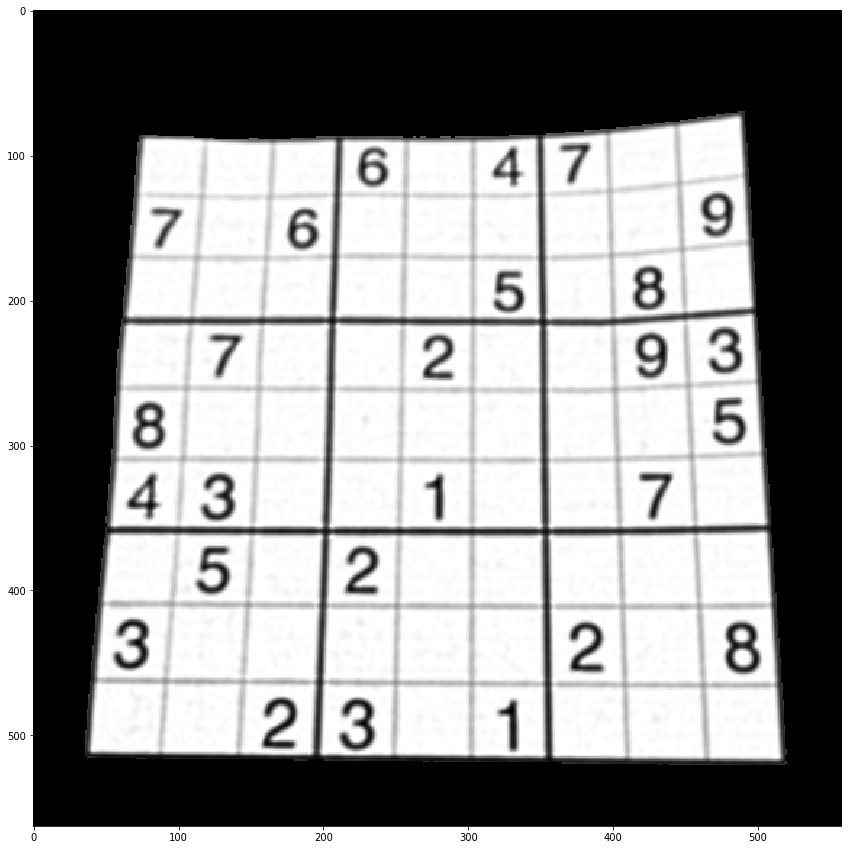

In [8]:
show_pic(res)

In [9]:
kernelx = cv2.getStructuringElement(cv2.MORPH_RECT,(2,10))

dx = cv2.Sobel(res,cv2.CV_16S,1,0)
dx = cv2.convertScaleAbs(dx)
cv2.normalize(dx,dx,0,255,cv2.NORM_MINMAX)
ret,close = cv2.threshold(dx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
close = cv2.morphologyEx(close,cv2.MORPH_DILATE,kernelx,iterations = 1)

contour, hier = cv2.findContours(close,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contour:
    x,y,w,h = cv2.boundingRect(cnt)
    if h/w > 5:
        cv2.drawContours(close,[cnt],0,255,-1)
    else:
        cv2.drawContours(close,[cnt],0,0,-1)
close = cv2.morphologyEx(close,cv2.MORPH_CLOSE,None,iterations = 2)
closex = close.copy()

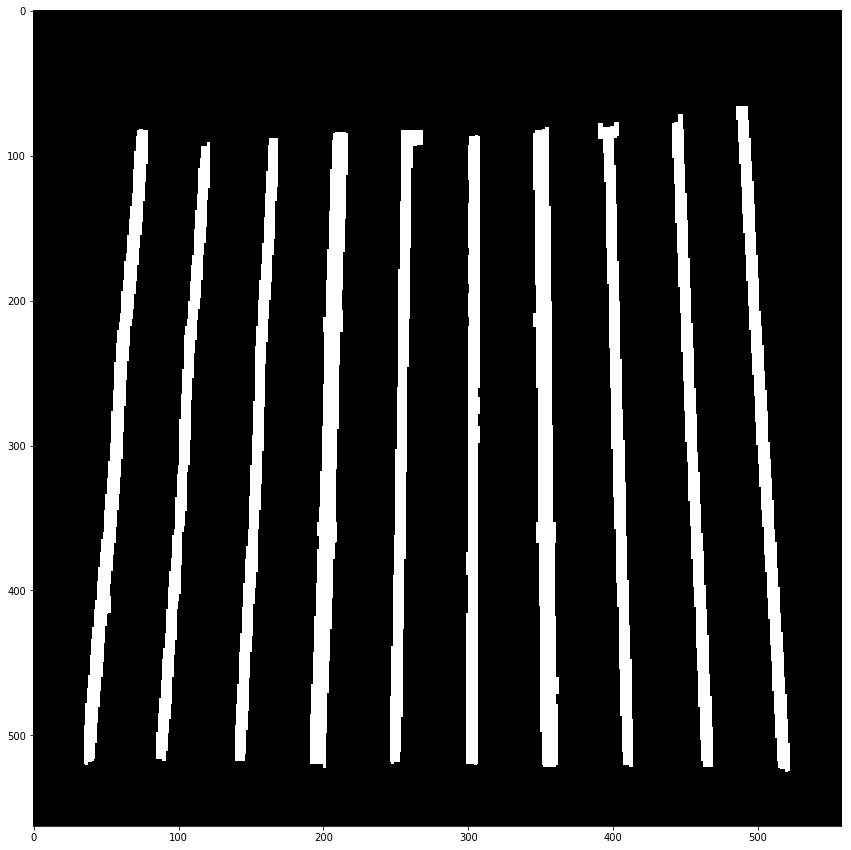

In [10]:
show_pic(closex)

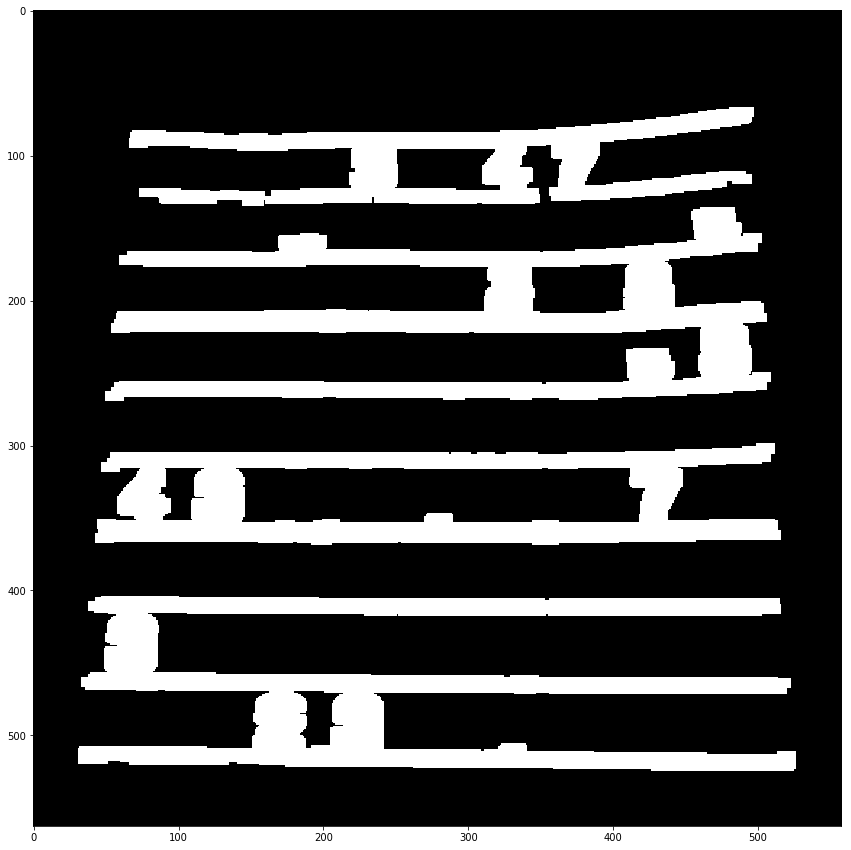

In [11]:
kernely = cv2.getStructuringElement(cv2.MORPH_RECT,(9,2))
dy = cv2.Sobel(res,cv2.CV_16S,0,1)
dy = cv2.convertScaleAbs(dy)
cv2.normalize(dy,dy,0,255,cv2.NORM_MINMAX)
ret,close = cv2.threshold(dy,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
close = cv2.morphologyEx(close,cv2.MORPH_DILATE,kernely)

contour, hier = cv2.findContours(close,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contour:
    x,y,w,h = cv2.boundingRect(cnt)
    if w/h > 5:
        cv2.drawContours(close,[cnt],0,255,-1)
    else:
        cv2.drawContours(close,[cnt],0,0,-1)

close = cv2.morphologyEx(close,cv2.MORPH_DILATE,None,iterations = 2)
closey = close.copy()
show_pic(closey)


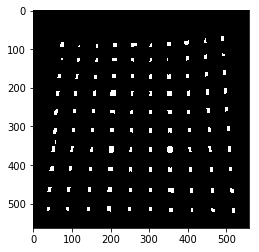

In [12]:
res = cv2.bitwise_and(closex,closey)
plt.imshow(res,cmap='gray')

In [13]:
contour, hier = cv2.findContours(res,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
centroids = []
for cnt in contour:
    mom = cv2.moments(cnt)
    if mom['m00']:
        (x,y) = int(mom['m10']/mom['m00']), int(mom['m01']/mom['m00'])
        cv2.circle(img,(x,y),4,(0,255,0),-1)
        centroids.append((x,y))

In [14]:
centroids = np.array(centroids,dtype = np.float32)
c = centroids.reshape((100,2))
c2 = c[np.argsort(c[:,1])]

b = np.vstack([c2[i*10:(i+1)*10][np.argsort(c2[i*10:(i+1)*10,0])] for i in range(10)])
bm = b.reshape((10,10,2))

In [15]:
output = np.zeros((450,450,3),np.uint8)
for i,j in enumerate(b):
    ri = int(i/10)
    ci = i%10
    if ci != 9 and ri!=9:
        src = bm[ri:ri+2, ci:ci+2 , :].reshape((4,2))
        dst = np.array( [ [ci*50,ri*50],[(ci+1)*50-1,ri*50],[ci*50,(ri+1)*50-1],[(ci+1)*50-1,(ri+1)*50-1] ], np.float32)
        retval = cv2.getPerspectiveTransform(src,dst)
        warp = cv2.warpPerspective(res2,retval,(450,450))
        output[ri*50:(ri+1)*50-1 , ci*50:(ci+1)*50-1] = warp[ri*50:(ri+1)*50-1 , ci*50:(ci+1)*50-1].copy()

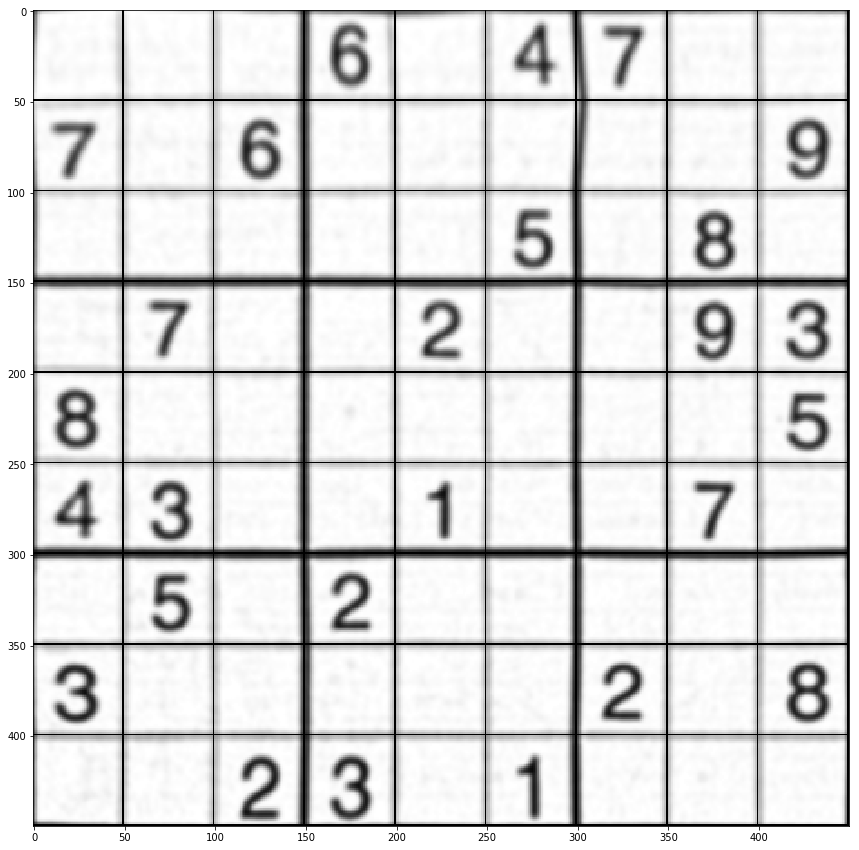

In [16]:

output1 = output
show_pic(output1)

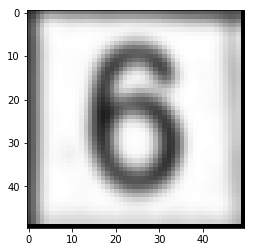

In [22]:
plt.imshow(output1[0:50,150:200])


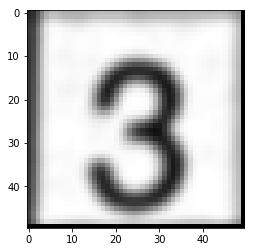

In [23]:
plt.imshow(output1[400:,150:200])